# Decision trees

Can be used for both regression and classification and are usually considered a very good exploratory [model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier). Essentially, the model learns a set of 'if-then' rules, which we can represent in form of trees

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import warnings

warnings.filterwarnings('ignore')

df_AIMD = pd.read_csv("Dist_AIMD.csv") 
df_MD = pd.read_csv('Dist_MD.csv')
df_fin = pd.concat([df_AIMD, df_MD])

df_shuffle = shuffle(df_fin, random_state=0)

from sklearn.model_selection import train_test_split

# Data selection 
# First we shall select the closest oxygens and later add the rest to see the effects of increasing features
# Then we will repeat it for hydrogens
X3 = df_shuffle[['S-O1', 'C-O1', 'N-O1']]
X6 = df_shuffle[['S-O1', 'C-O1', 'N-O1', 'S-O2', 'C-O2', 'N-O2']]

H3 = df_shuffle[['S-H1', 'C-H1', 'N-H1']]
H6 = df_shuffle[['S-H1', 'C-H1', 'N-H1', 'S-H2', 'C-H2', 'N-H2']]
y = df_shuffle['Class']

# Splitting the data into training(80%) and test(20%) set

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.20, random_state=0)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.20, random_state=0)

## Decision tree classifier

Each decision (if-then relation) splits the data into two branches which continue till the leaves(end-points) are pure. This has a tendency to overfit which we can manage by pruning the trees. 

We can also see the feature importances in this model and plot the tree to see how exactly it predicts.

Number of features seen in the fit:  3
Feature names and weights:
 [('C-O1', 0.4827938303027319), ('N-O1', 0.3222648726266741), ('S-O1', 0.19494129707059407)]
Depth of tree:  10
Training accuracy for Decision tree without pruning with 3 features:  1.0
Test accuracy for Decision tree without pruning with 3 features:  0.7619047619047619


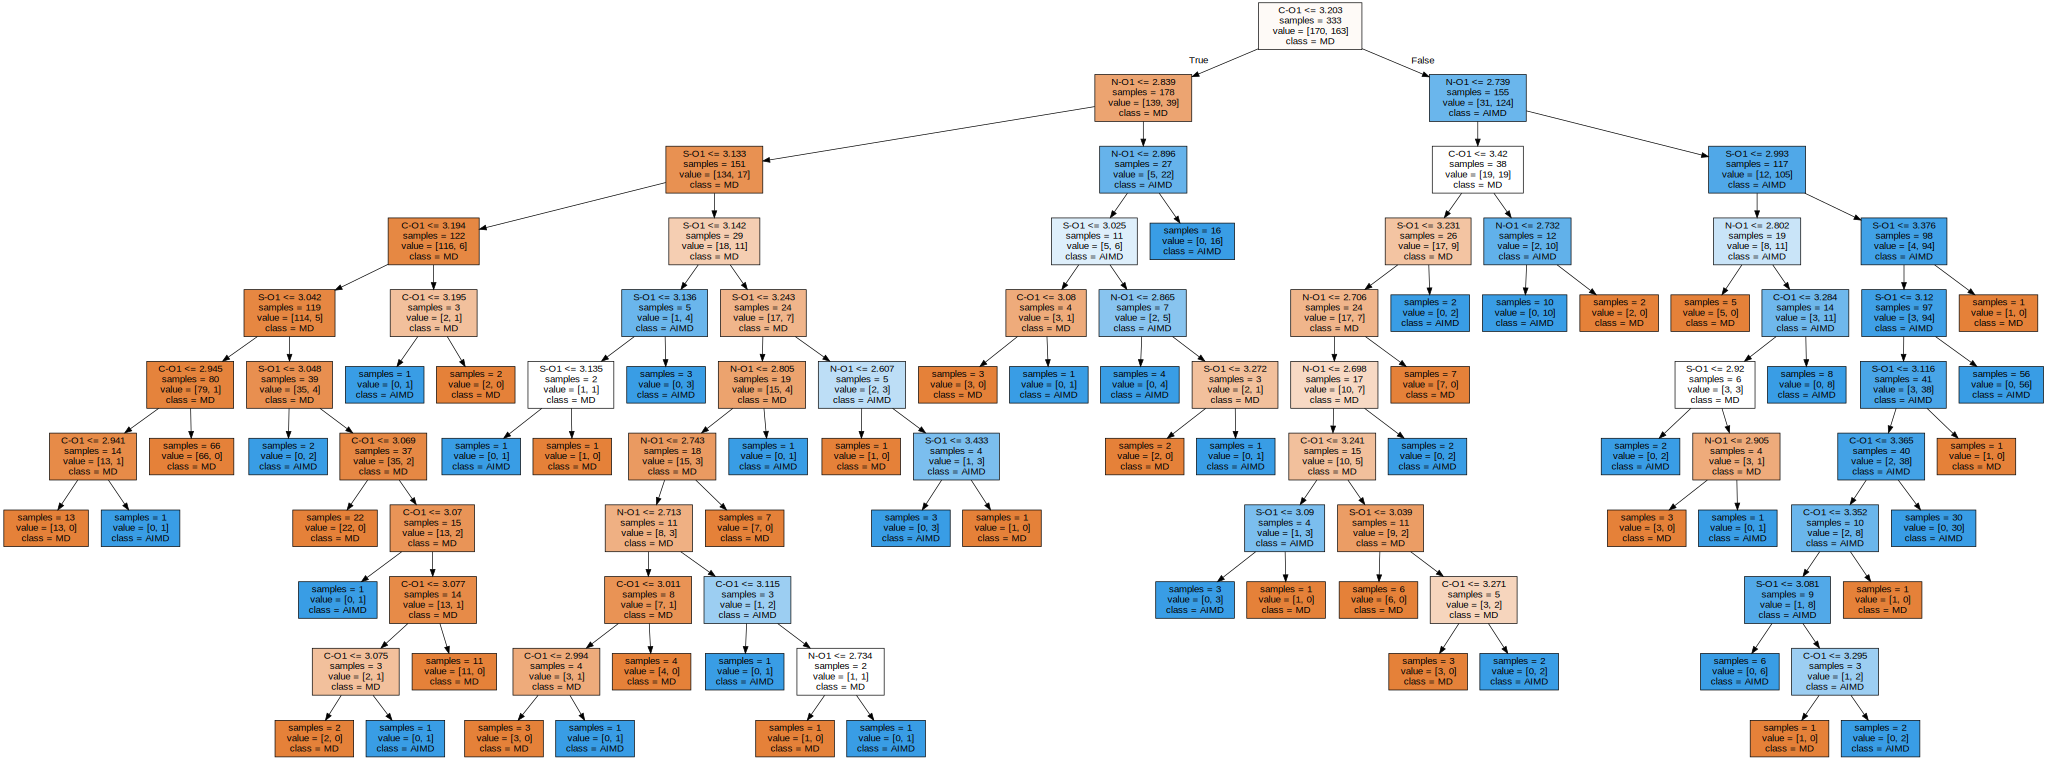

In [2]:
from sklearn.tree import DecisionTreeClassifier
import my_utils

# No pruning of the tree
dt = DecisionTreeClassifier(max_depth=None, random_state=0)

# 3 feature model
dt.fit(X3_train, y3_train)

print("Number of features seen in the fit: ",dt.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(dt.feature_names_in_,dt.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Depth of tree: ", dt.get_depth())
print("Training accuracy for Decision tree without pruning with 3 features: ", dt.score(X3_train, y3_train))
print("Test accuracy for Decision tree without pruning with 3 features: ", dt.score(X3_test, y3_test))

my_utils.plot_decision_tree(dt, dt.feature_names_in_, ['MD', 'AIMD'])

With 3 feature model we see the tell-tale signs of overfitting (train_score = 1.0, poor test_score). 

### Next we try pruning the tree to max_depth=3 and plot the tree.  

Number of features seen in the fit:  3
Feature names and weights:
 [('C-O1', 0.5758648823827158), ('N-O1', 0.3306603129085733), ('S-O1', 0.09347480470871089)]
Depth of tree:  3
Training accuracy for Decision tree with pruning with 3 features:  0.8648648648648649
Test accuracy for Decision tree with pruning with 3 features:  0.8809523809523809


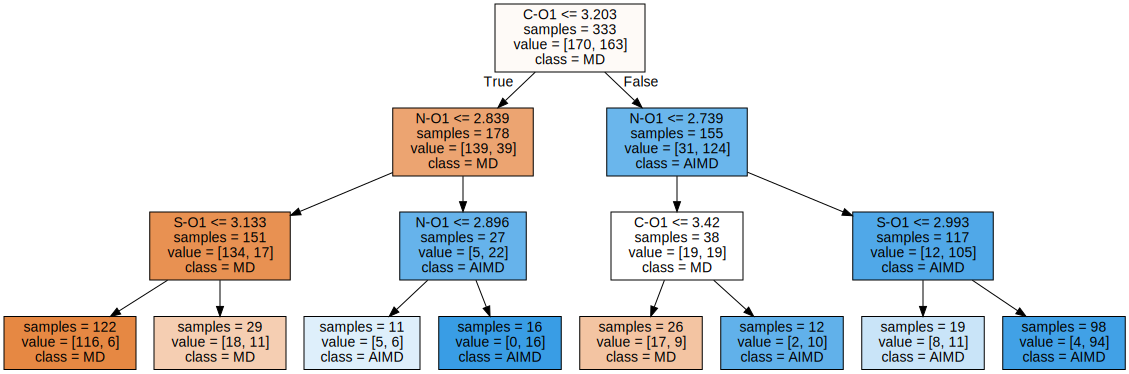

In [3]:
# No pruning of the tree
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

# 3 feature model
dt.fit(X3_train, y3_train)

print("Number of features seen in the fit: ",dt.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(dt.feature_names_in_,dt.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Depth of tree: ", dt.get_depth())
print("Training accuracy for Decision tree with pruning with 3 features: ", dt.score(X3_train, y3_train))
print("Test accuracy for Decision tree with pruning with 3 features: ", dt.score(X3_test, y3_test))

my_utils.plot_decision_tree(dt, dt.feature_names_in_, ['MD', 'AIMD'])

### The training and test scores are much better in the pruned case. Now for the 6 feature case

Number of features seen in the fit:  6
Feature names and weights:
 [('C-O2', 0.5523952965070614), ('N-O2', 0.2369190447260947), ('S-O1', 0.08465952997955208), ('N-O1', 0.05005898050786041), ('S-O2', 0.04031639405434415), ('C-O1', 0.03565075422508715)]
Depth of tree:  11
Training accuracy for Decision tree without pruning with 3 features:  1.0
Test accuracy for Decision tree without pruning with 3 features:  0.9047619047619048

Number of features seen in the fit:  6
Feature names and weights:
 [('C-O2', 0.6852460146457922), ('N-O2', 0.24971475710156302), ('S-O1', 0.06503922825264485), ('C-O1', 0.0), ('N-O1', 0.0), ('S-O2', 0.0)]
Depth of tree:  3
Training accuracy for Decision tree with pruning with 6 features:  0.9279279279279279
Test accuracy for Decision tree with pruning with 6 features:  0.8690476190476191


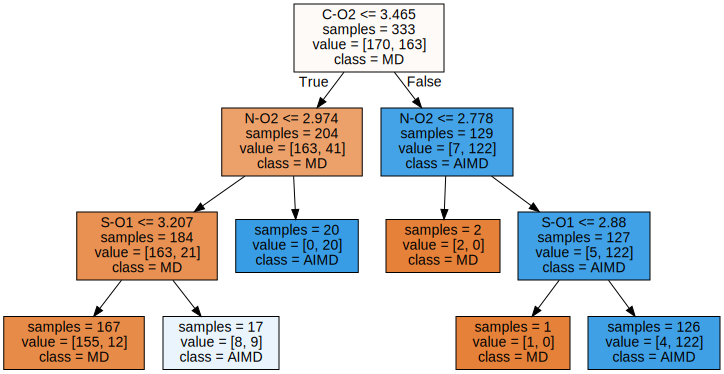

In [4]:
# No pruning
dt = DecisionTreeClassifier(max_depth=None, random_state=0)

# 6 feature model
dt.fit(X6_train, y6_train)

print("Number of features seen in the fit: ",dt.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(dt.feature_names_in_,dt.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Depth of tree: ", dt.get_depth())
print("Training accuracy for Decision tree without pruning with 3 features: ", dt.score(X6_train, y6_train))
print("Test accuracy for Decision tree without pruning with 3 features: ", dt.score(X6_test, y6_test))

# Pruned tree
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X6_train, y6_train)

print("\nNumber of features seen in the fit: ",dt.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(dt.feature_names_in_,dt.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Depth of tree: ", dt.get_depth())
print("Training accuracy for Decision tree with pruning with 6 features: ", dt.score(X6_train, y6_train))
print("Test accuracy for Decision tree with pruning with 6 features: ", dt.score(X6_test, y6_test))

my_utils.plot_decision_tree(dt, dt.feature_names_in_, ['MD', 'AIMD'])

### A lot of interesting things to note here, 
1. In the unpruned tree, the depth is 11 and it increases from the 3 feature case. The model is still overfitting but each feature has a weight. 

2. In the pruned tree with depth 3, the overfitting problem is fixed but not all features have a weight anymore, which makes sense if only one feature is being considered per split (or per tree level). 

3. Compared to support vector classifier or logistic regression, the C-O2 distance holds the most weight here, followed by N-O2. The plotted decision tree also make interpretation easier. 

4. We plot the feature importances below in a bar chart

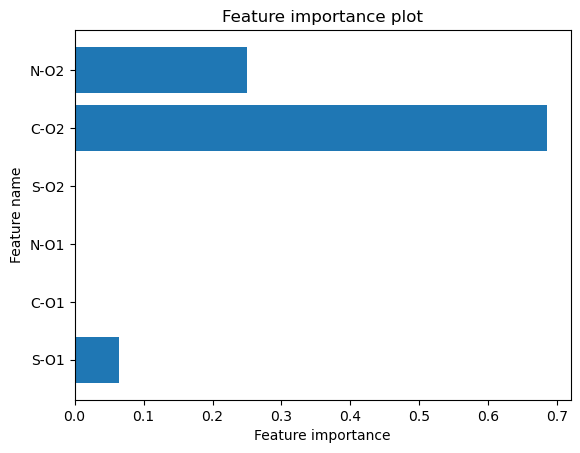

In [5]:
# Plotting the feature importances

my_utils.plot_feature_importance(dt, dt.feature_names_in_)

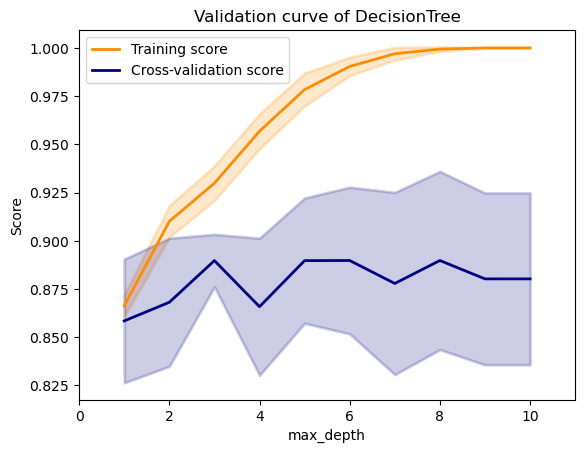

In [6]:
# Validation curve
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 11, 1)

train_score, test_score = validation_curve(DecisionTreeClassifier(random_state=0), X6, y, 
                                          param_name = 'max_depth', param_range = param_range, cv=5)

my_utils.plot_validation_curve(train_score, test_score, param_range, 'DecisionTree', 'max_depth')

The validation curve shows how easy it is for decision trees to get overfit, and so we must be careful when using this model to do any kind of interperetation. We also should not think too deeply into the feature weights when using single decision trees. Later we will explore ensemble descision trees and gradient boosted decision trees which should be more stable. 

### Repeating the calculations for the H dataset, we will use pruned trees with max_depth = 3

Number of features seen in the fit:  3
Feature names and weights:
 [('C-H1', 0.795380840392008), ('N-H1', 0.1590824202202286), ('S-H1', 0.04553673938776339)]
Depth of tree:  3
Training accuracy for Decision tree with pruning with 3 features:  0.9009009009009009
Test accuracy for Decision tree with pruning with 3 features:  0.8095238095238095


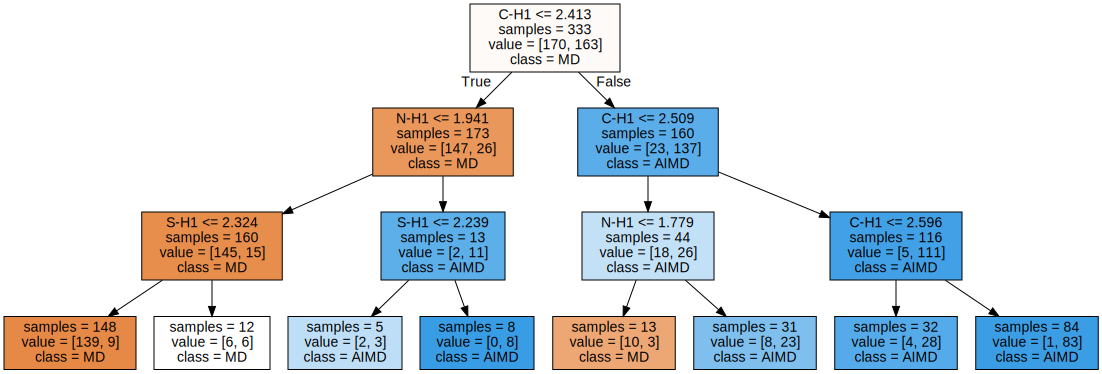

In [7]:
# Train test split
X3_train, X3_test, y3_train, y3_test = train_test_split(H3, y, test_size=0.20, random_state=0)
X6_train, X6_test, y6_train, y6_test = train_test_split(H6, y, test_size=0.20, random_state=0)

# Define the DecisionTree
dt = DecisionTreeClassifier(random_state=0, max_depth=3)

# 3 feature model 
dt.fit(X3_train, y3_train)

print("Number of features seen in the fit: ",dt.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(dt.feature_names_in_,dt.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Depth of tree: ", dt.get_depth())
print("Training accuracy for Decision tree with pruning with 3 features: ", dt.score(X3_train, y3_train))
print("Test accuracy for Decision tree with pruning with 3 features: ", dt.score(X3_test, y3_test))

my_utils.plot_decision_tree(dt, dt.feature_names_in_, ['MD', 'AIMD'])

Number of features seen in the fit:  6
Feature names and weights:
 [('C-H2', 0.8128516662171811), ('C-H1', 0.06843788933368554), ('N-H2', 0.06552173781717112), ('N-H1', 0.05318870663196232), ('S-H1', 0.0), ('S-H2', 0.0)]
Depth of tree:  3
Training accuracy for Decision tree with pruning with 6 features:  0.9369369369369369
Test accuracy for Decision tree with pruning with 6 features:  0.9166666666666666


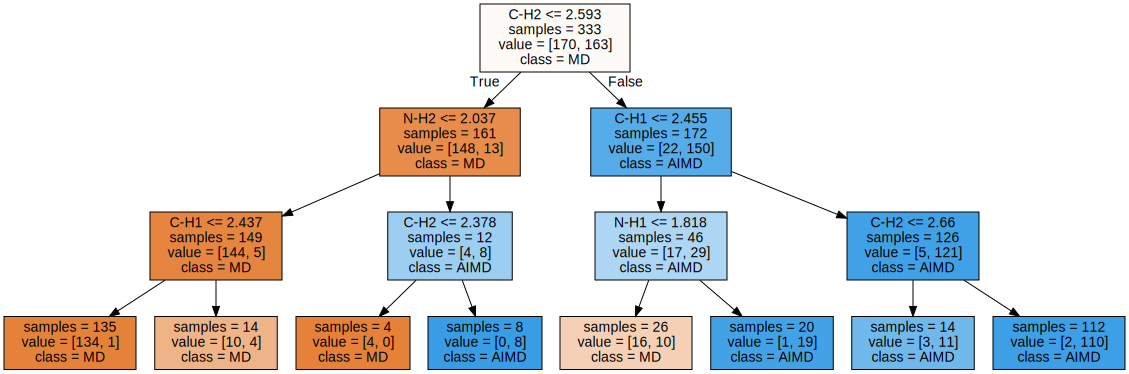

In [8]:
# 6 feature model 
dt.fit(X6_train, y6_train)

print("Number of features seen in the fit: ",dt.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(dt.feature_names_in_,dt.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Depth of tree: ", dt.get_depth())
print("Training accuracy for Decision tree with pruning with 6 features: ", dt.score(X6_train, y6_train))
print("Test accuracy for Decision tree with pruning with 6 features: ", dt.score(X6_test, y6_test))

my_utils.plot_decision_tree(dt, dt.feature_names_in_, ['MD', 'AIMD'])

### Again, lots of interesting things to see, 
1. For the 6 feature case, the H dataset has a greater accuracy score than the O dataset.

2. For the H feature case, the C-H1 and C-H2 bond lenghts dominate the feature importances. 

3. Compared to SVC or logistic regression, DecisionTrees give a higher accuracy score for the 6 feature H case, than the 6 feature O case. There is no underlying reason for it.


## Decision trees are special since correlated features do not usually trip them up.

Number of features seen in the fit:  12
Feature names and weights:
 [('C-H2', 0.7706256049323646), ('N-H2', 0.08807221045233771), ('N-O1', 0.06302858806578389), ('S-O2', 0.050577151088981705), ('C-H1', 0.01453858340956601), ('S-O1', 0.011787690578180356), ('N-O2', 0.0013701714727856625), ('S-H1', 0.0), ('S-H2', 0.0), ('C-O1', 0.0), ('C-O2', 0.0), ('N-H1', 0.0)]
Depth of tree:  4
Training accuracy for Decision tree with pruning with 12 features:  0.9369369369369369
Test accuracy for Decision tree with pruning with 12 features:  0.9404761904761905


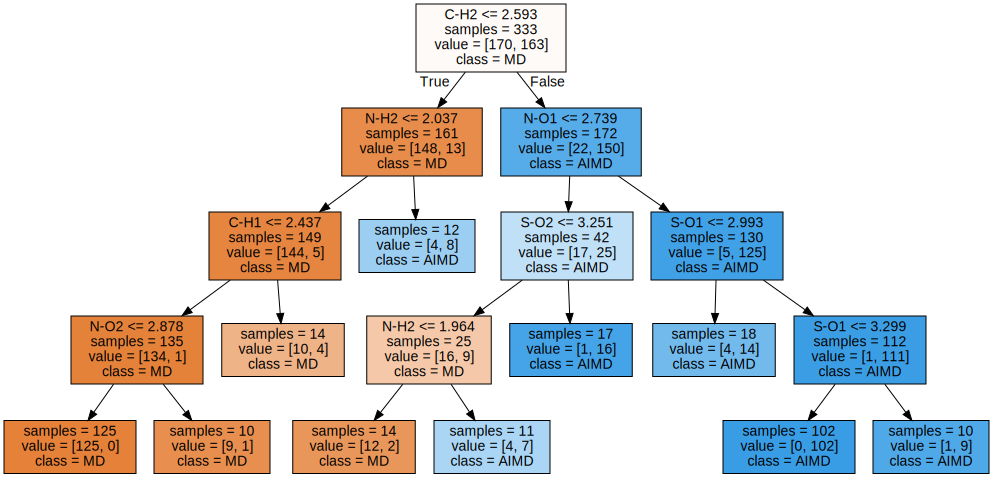

In [9]:
# Use the full dataset (12 features) for training, y remains the same
X = df_shuffle.iloc[:,2:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

dt = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=10)
dt.fit(X_train, y_train)

print("Number of features seen in the fit: ",dt.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(dt.feature_names_in_,dt.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Depth of tree: ", dt.get_depth())
print("Training accuracy for Decision tree with pruning with 12 features: ", dt.score(X_train, y_train))
print("Test accuracy for Decision tree with pruning with 12 features: ", dt.score(X_test, y_test))

my_utils.plot_decision_tree(dt, dt.feature_names_in_, ['MD', 'AIMD'])


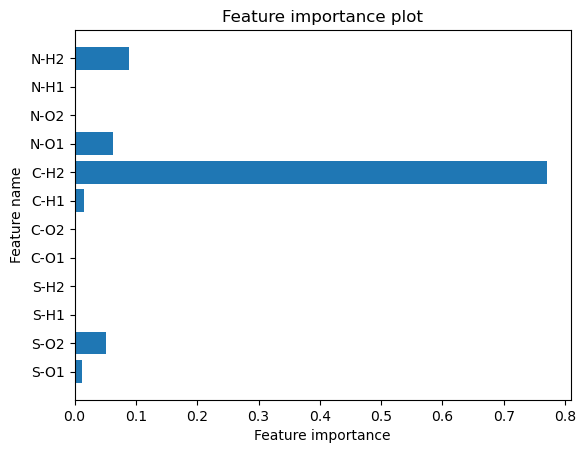

In [10]:
# Plotting the feature importances

my_utils.plot_feature_importance(dt, dt.feature_names_in_)

With the full 12 features and after some fiddling, the best model parameters come out to be,
1. max_depth = 4
2. min_samples_leaf=10 (The minimum number of samples required to be at a leaf node)

We also plot the decision importance graph which shows the C-H2 distance dominating the weights, followed by N-H2, and N-O1. We should always take the feature weights with a grain of salt since decision trees can very well be overfit, even after tuning. 